# hapus outlier, transformasi + hapus undefined di meal, market_segment, distribusi_channel, hapus adult=0

## load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RAKAMIN-FINPRO/hotel_booking.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

1. masalah: cancellation rate hotel booking
2. we are a consuntan team, we are BlueCode
3. obj: menurunkan cancellation rate
4. goal: menurunkan cancellation rate dr 37% ke 20%
5. business metric: % cancellation rate

In [ ]:
df_pre = df.copy()

In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df_pre.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
32704,Resort Hotel,0,1,2017,February,5,1,0,1,1,...,Transient-Party,35.0,0,0,Check-Out,2017-02-02,Deborah Woods,Deborah_W@outlook.com,585-557-9401,************3770
26972,Resort Hotel,0,206,2016,August,33,8,3,5,3,...,Transient,250.0,0,0,Check-Out,2016-08-16,Meagan Evans,Meagan.E@zoho.com,155-988-0790,************1188
39880,Resort Hotel,0,59,2017,August,34,26,2,3,2,...,Transient,230.0,0,4,Check-Out,2017-08-31,Roger Holland,Holland.Roger@protonmail.com,844-286-2596,************3521
72645,City Hotel,1,22,2017,August,31,2,0,3,2,...,Transient,166.0,0,1,Canceled,2017-07-11,Michael Miles,Michael.Miles66@xfinity.com,214-575-7026,************8590
14252,Resort Hotel,0,224,2015,August,33,14,2,3,2,...,Transient,134.0,0,0,Check-Out,2015-08-19,Meghan Pena,Meghan.Pena@xfinity.com,852-950-9048,************3120


### handle missing value

In [ ]:
#Handling Missing Values (drop 4 baris kolom children yg kosong)
df_pre = df_pre.dropna(subset=['children'])

In [ ]:
df_pre['country']= df_pre['country'].fillna(df_pre['country'].mode()[0])
df_pre.drop('company', axis = 1, inplace=True)
df_pre.drop('agent', axis = 1, inplace = True)

In [ ]:
#drop kolom data pribadi
data_pribadi = ['name', 'email', 'phone-number', 'credit_card']
df_pre.drop(data_pribadi, axis = 1, inplace=True)

In [ ]:
df_pre['market_segment'].mode()[0]

'Online TA'

In [ ]:
df_pre['distribution_channel'].mode()[0]

'TA/TO'

In [ ]:
#adjust value meal_unident dan distribusi_channel_unid dengan mode
#meal SC = no meal package
df_pre['meal'].replace('Undefined','SC', inplace= True)
df_pre['distribution_channel'].replace('Undefined','TA/TO', inplace= True)
df_pre['market_segment'].replace('Undefined','Online TA', inplace= True)

In [ ]:
# drop adult = 0
df_pre = df_pre[df_pre.adults != 0]

In [ ]:
df_pre.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
77880,City Hotel,0,16,2015,September,39,25,2,3,3,...,D,2,No Deposit,0,Transient-Party,170.0,0,0,Check-Out,2015-09-30
21443,Resort Hotel,0,16,2016,February,9,27,1,1,2,...,D,0,No Deposit,0,Transient,48.0,0,1,Check-Out,2016-02-29
65382,City Hotel,1,9,2017,April,13,1,2,4,2,...,F,0,No Deposit,0,Transient,224.0,0,0,Canceled,2017-03-25


In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118983 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118983 non-null  object 
 1   is_canceled                     118983 non-null  int64  
 2   lead_time                       118983 non-null  int64  
 3   arrival_date_year               118983 non-null  int64  
 4   arrival_date_month              118983 non-null  object 
 5   arrival_date_week_number        118983 non-null  int64  
 6   arrival_date_day_of_month       118983 non-null  int64  
 7   stays_in_weekend_nights         118983 non-null  int64  
 8   stays_in_week_nights            118983 non-null  int64  
 9   adults                          118983 non-null  int64  
 10  children                        118983 non-null  float64
 11  babies                          118983 non-null  int64  
 12  meal            

### Adjust Data Type

In [ ]:
# children jd int
df_pre['children'] = df_pre['children'].astype(int)

# reservation_status_date jd datetime 
df_pre['reservation_status_date'] = pd.to_datetime(df_pre['reservation_status_date'])


In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118983 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118983 non-null  object        
 1   is_canceled                     118983 non-null  int64         
 2   lead_time                       118983 non-null  int64         
 3   arrival_date_year               118983 non-null  int64         
 4   arrival_date_month              118983 non-null  object        
 5   arrival_date_week_number        118983 non-null  int64         
 6   arrival_date_day_of_month       118983 non-null  int64         
 7   stays_in_weekend_nights         118983 non-null  int64         
 8   stays_in_week_nights            118983 non-null  int64         
 9   adults                          118983 non-null  int64         
 10  children                        118983 non-null  int64  

### handle outlier 

Handle Outlier pada fitur 'adr' menggunakan ZScore

In [ ]:
# pengelompokkan columns berdasarkan jenis columns 
cats_pre = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
nums_pre = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces']

In [ ]:
#ubah value minus adr

def adr_zero(x):
  if x['adr'] < 0:
    adr = 0
  else:
    adr = x['adr']
  return adr

df_pre['adr'] = df_pre.apply(lambda x: adr_zero(x), axis=1)

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_pre)}')

filtered_entries = np.array([True] * len(df_pre))

for col in nums_pre:
    zscore = abs(stats.zscore(df_pre[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_pre = df_pre[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_pre)}')

Jumlah baris sebelum memfilter outlier: 118983
Jumlah baris setelah memfilter outlier: 97372


### feature engineer

### feature transformasi

#### log transform

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

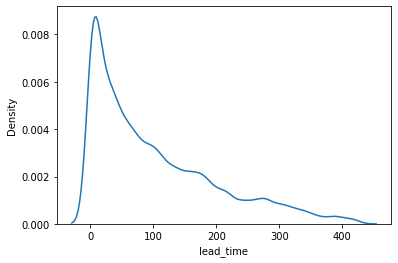

In [ ]:
sns.kdeplot(df_pre['lead_time'])

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

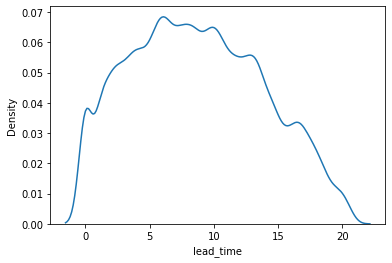

In [ ]:
sns.kdeplot(np.sqrt(df_pre['lead_time']))

In [ ]:
df_pre['lead_time_sqrt'] = np.sqrt(df_pre['lead_time'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

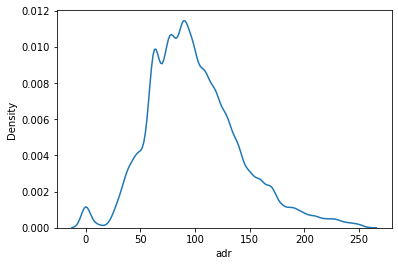

In [ ]:
sns.kdeplot(df_pre['adr'])

Kolom ADR tidak dilakukan transformasi karena sudah mendekati normal

#### normalisasi

In [ ]:
df_pre['lead_time_norm'] = MinMaxScaler().fit_transform(df_pre['lead_time_sqrt'].values.reshape(len(df_pre), 1))
df_pre['adr_norm'] = MinMaxScaler().fit_transform(df_pre['adr'].values.reshape(len(df_pre), 1))
df_pre['total_of_special_requests_norm'] = MinMaxScaler().fit_transform(df_pre['total_of_special_requests'].values.reshape(len(df_pre), 1))

In [ ]:
#drop kolom asli krn udh dinormalisasi
df_pre.drop('lead_time_sqrt', axis = 1, inplace=True)
df_pre.drop('total_of_special_requests', axis = 1, inplace=True)
df_pre.drop('lead_time', axis = 1, inplace=True)
df_pre.drop('adr', axis = 1, inplace=True)

In [ ]:
df_pre.isna().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
adr_norm                          0
lead_time_norm                    0
reservation_status_date           0
reservation_status                0
required_car_parking_spaces       0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month          

In [ ]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97372 entries, 2 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           97372 non-null  object        
 1   is_canceled                     97372 non-null  int64         
 2   arrival_date_year               97372 non-null  int64         
 3   arrival_date_month              97372 non-null  object        
 4   arrival_date_week_number        97372 non-null  int64         
 5   arrival_date_day_of_month       97372 non-null  int64         
 6   stays_in_weekend_nights         97372 non-null  int64         
 7   stays_in_week_nights            97372 non-null  int64         
 8   adults                          97372 non-null  int64         
 9   children                        97372 non-null  int64         
 10  babies                          97372 non-null  int64         
 11  m

### encoding

In [ ]:
cats_encode = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type'] 

for col in cats_encode:
  print(f'value counts of column {col}')
  print(df_pre[col].value_counts())
  print('---'*10, '\n')

value counts of column hotel
City Hotel      69069
Resort Hotel    28303
Name: hotel, dtype: int64
------------------------------ 

value counts of column meal
BB    74520
HB    11281
SC    10943
FB      628
Name: meal, dtype: int64
------------------------------ 

value counts of column market_segment
Online TA        47384
Offline TA/TO    20577
Groups           16916
Direct            8666
Corporate         3276
Complementary      405
Aviation           148
Name: market_segment, dtype: int64
------------------------------ 

value counts of column distribution_channel
TA/TO        82609
Direct       10248
Corporate     4328
GDS            187
Name: distribution_channel, dtype: int64
------------------------------ 

value counts of column deposit_type
No Deposit    84585
Non Refund    12666
Refundable      121
Name: deposit_type, dtype: int64
------------------------------ 

value counts of column customer_type
Transient          72494
Transient-Party    21208
Contract            3317

Strategi encoding
* `hotel` \: label encoding
* `meal`, `market_segment`, `distribution_channel`, `deposit_type`, `customer_type` \: One Hot Encoding 

In [ ]:
# label encode
mapping_hotel = {
    'City Hotel' : 0,
    'Resort Hotel' : 1
}


df_pre['hotel'] = df_pre['hotel'].map(mapping_hotel)

In [ ]:
#One Hot Encoding
cats_ohe = ['meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type'] 

for cats in cats_ohe:
    onehots = pd.get_dummies(df_pre[cats], prefix=cats)
    df_pre = df_pre.join(onehots)

In [ ]:
# drop kolom kategori yang asli (karena sudah di-encoding)
df_pre_new = df_pre.drop(columns=['meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']).copy()

### imbalance

In [ ]:
#cek value target (is_cancelled)
counts = df_pre_new['is_canceled'].value_counts()
percent = df_pre_new['is_canceled'].value_counts(normalize=True)
percentages = df_pre_new['is_canceled'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'per': percent, '%': percentages})

,counts,per,%
0,58871,0.604599,60.5%
1,38501,0.395401,39.5%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


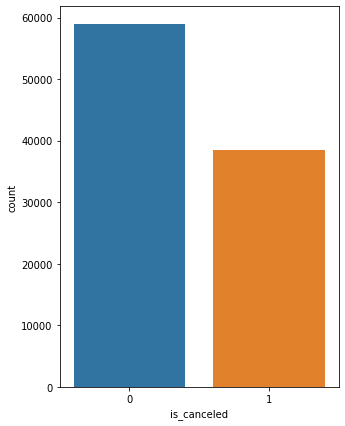

In [ ]:
plt.figure(figsize=(5, 7))
cancel_ax = sns.countplot(df_pre['is_canceled'])
plt.show()

Perbandingan antar kelas fitur target (is_canceled) masih dalam proporsi yang seimbang dan belum masuk kategori imbalance. Jadi tidak perlu melakukan undersampling atau oversampling

### feature selection

<AxesSubplot:>

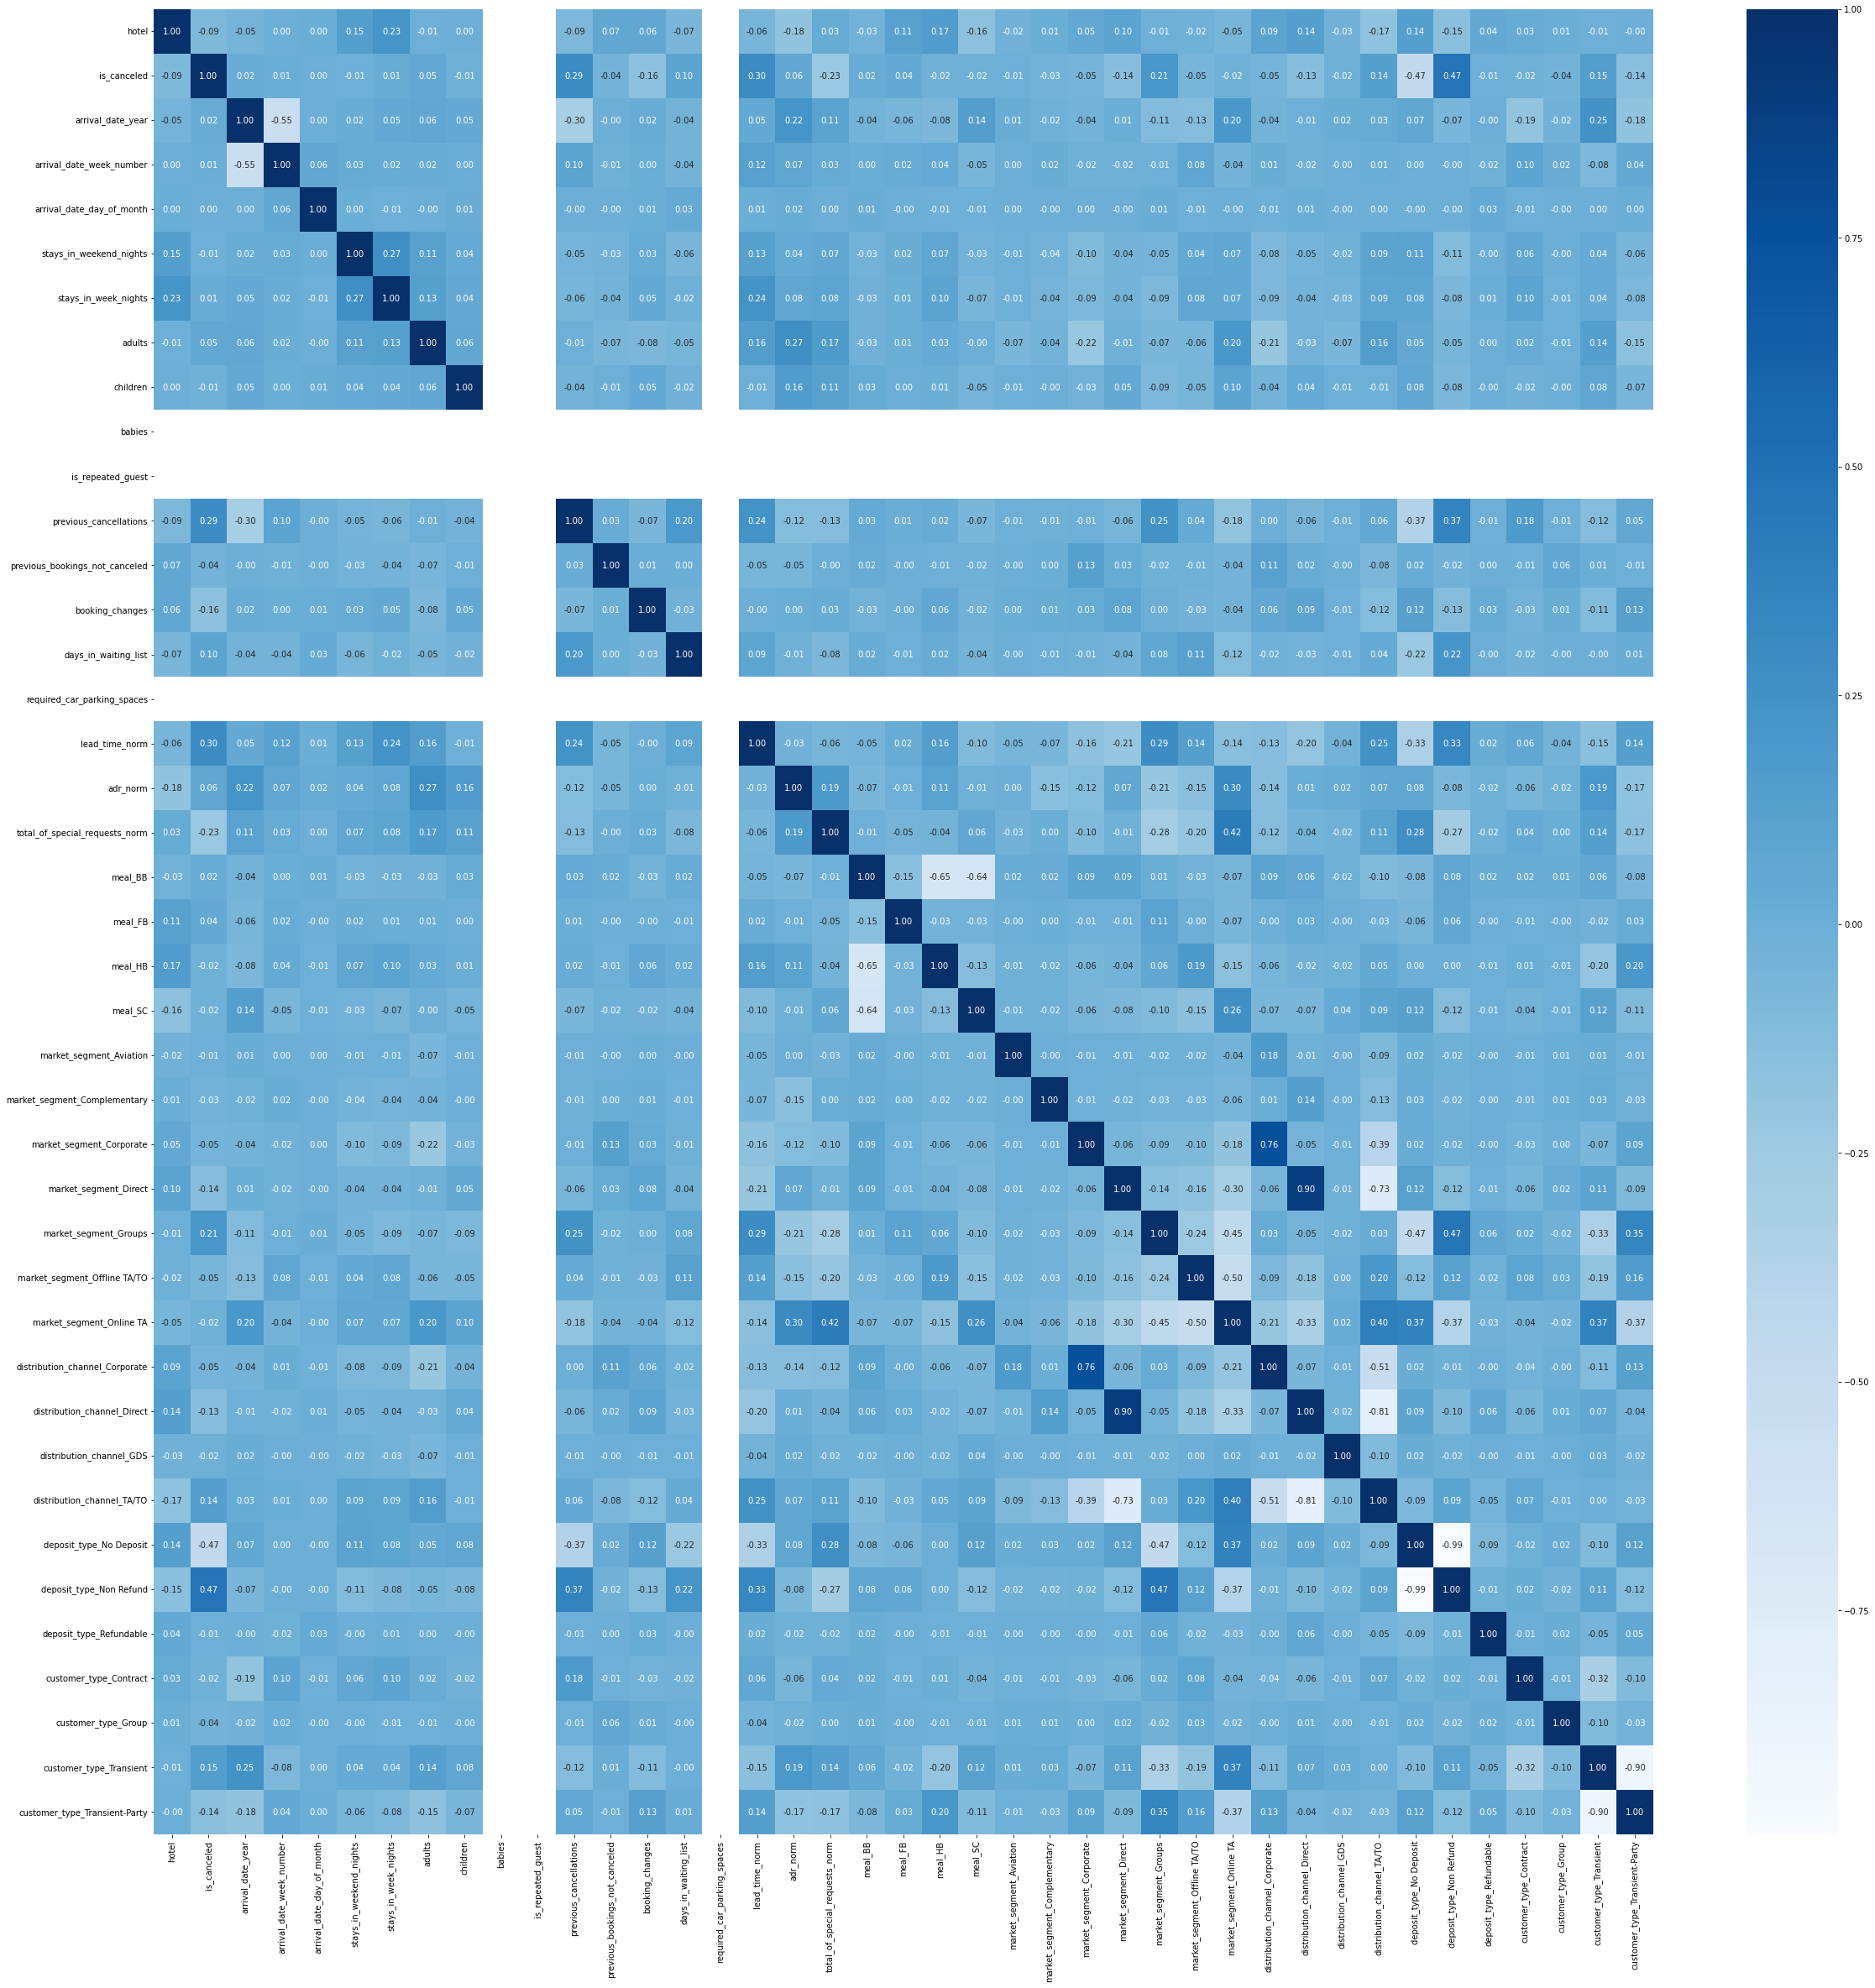

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_pre_new.corr(), cmap='Blues', annot=True, fmt='.2f')

Beberapa kolom yang memiliki redundan (korelasi antar fitur > 0.70) akan didrop, yaitu :
- **reservation status_date** (kedua nya akan didrop)
- **arrival_date_week_number** juga akan di drop
- **reservation_status** akan didrop
- **market_segment_Corporate dengan distribution_channel_Corporate** (akan di drop salah satu, yaitu market_segment_Corporate)
- **market_segment_direct dengan distribution_channel_direct** (akan di drop salah satu, yaitu distribution_channel_Direct)
- **distribution_channel_TA/TO dengan market_segment_direct** (market_segment_direct akan di drop)
- **distribution_channel_TA/TO dengan distribution_channel_direct**(distribution_channel_direct akan di drop)
- **customer_type_Transient dengan customer_type_Transient-Party** (customer_type_Transient-Party akan didrop) 
- **deposit_type_No Deposit dengan deposit_type_Non Refund** (deposit_type_Non Refund akan didrop)

In [ ]:
df_pre_new.drop(['arrival_date_week_number', 'arrival_date_year', 'reservation_status_date', 'reservation_status', 'market_segment_Corporate', 'market_segment_Direct', 'distribution_channel_Direct', 'customer_type_Transient-Party', 'deposit_type_Non Refund'], axis = 1, inplace=True)

<AxesSubplot:>

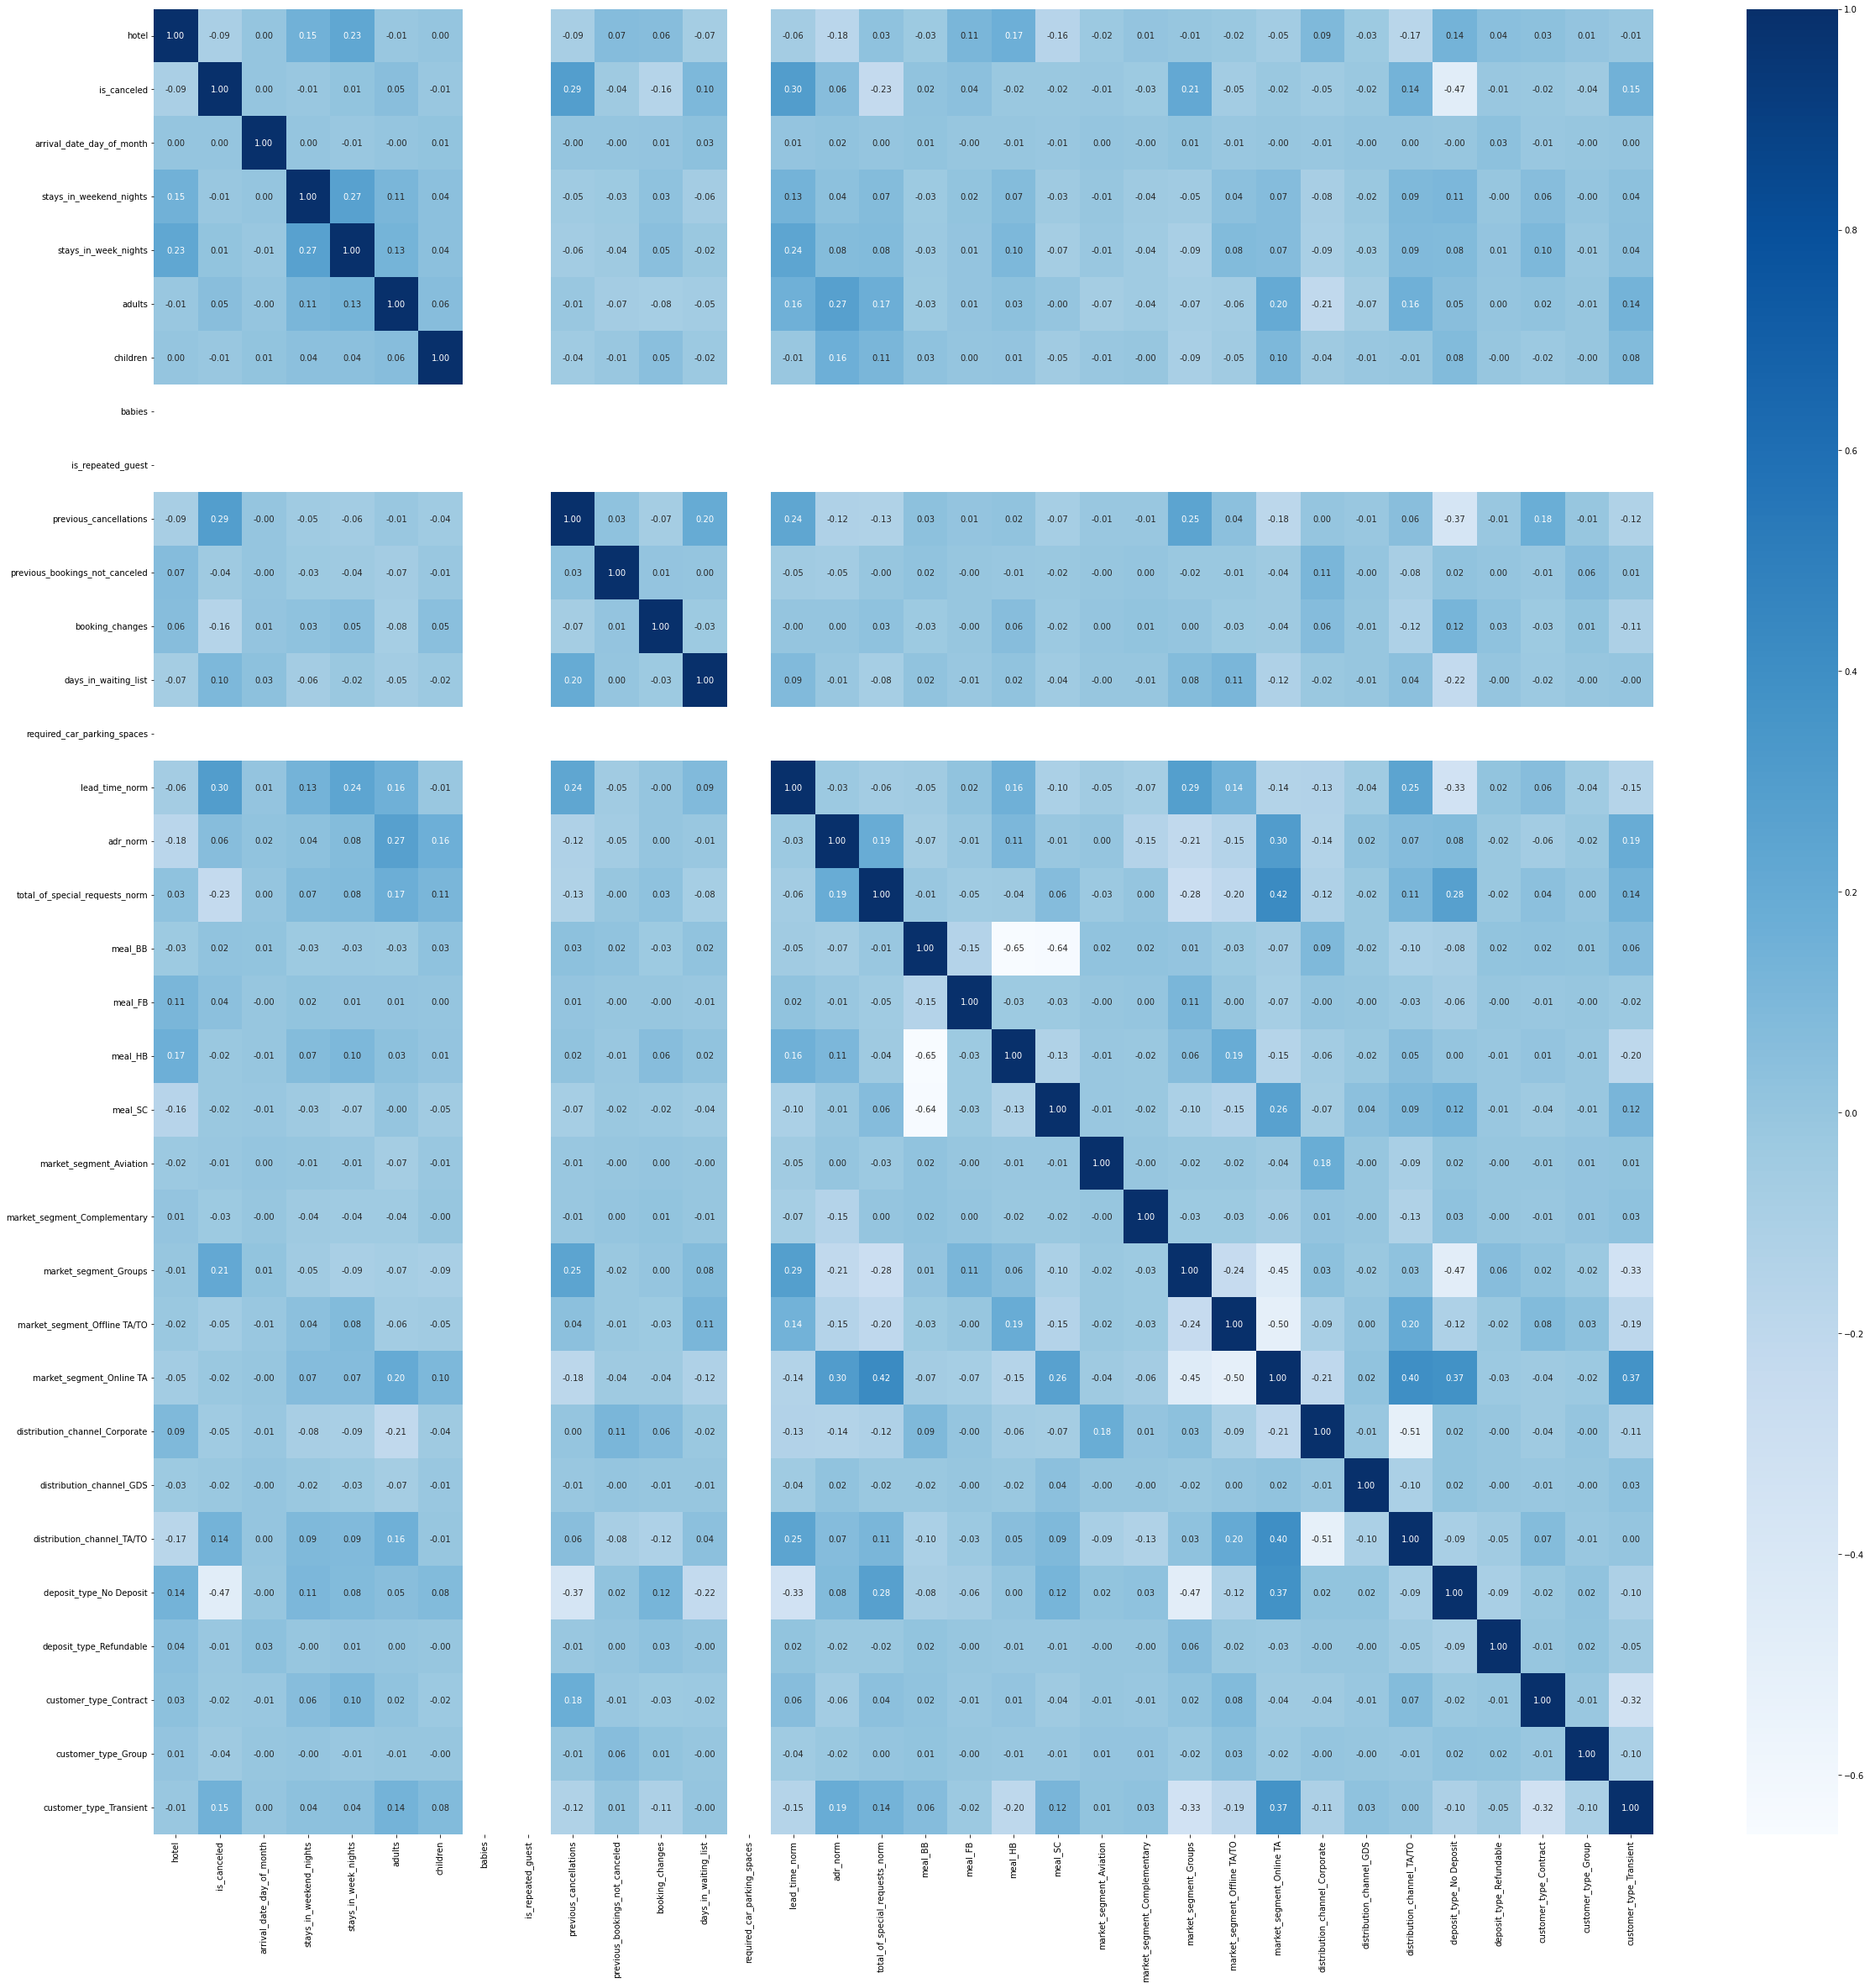

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_pre_new.corr(), cmap='Blues', annot=True, fmt='.2f')

Terlihat sudah tidak ada fitur redundan (korelasi antar fitur dengan nilai > 0.70)

In [ ]:
df_pre_new.columns

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'lead_time_norm', 'adr_norm',
       'total_of_special_requests_norm', 'meal_BB', 'meal_FB', 'meal_HB',
       'meal_SC', 'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'distribution_channel_Corporate',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'deposit_type_No Deposit', 'deposit_type_Refundable',
       'customer_type_Contract', 'customer_type_Group',
       'customer_type_Transient'],
      dtype='object')

In [ ]:
df_pre_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97372 entries, 2 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           97372 non-null  int64  
 1   is_canceled                     97372 non-null  int64  
 2   arrival_date_month              97372 non-null  object 
 3   arrival_date_day_of_month       97372 non-null  int64  
 4   stays_in_weekend_nights         97372 non-null  int64  
 5   stays_in_week_nights            97372 non-null  int64  
 6   adults                          97372 non-null  int64  
 7   children                        97372 non-null  int64  
 8   babies                          97372 non-null  int64  
 9   country                         97372 non-null  object 
 10  is_repeated_guest               97372 non-null  int64  
 11  previous_cancellations          97372 non-null  int64  
 12  previous_bookings_not_canceled 

### feature extraction 

In [ ]:
#reserved_room_types dan assigned_room_types digabungkan menjadi reserved_vs_assigned (1 untuk reserved == assigned, 0 untuk reserved != assigned)
def reserved_assigned (reserved_room_type, assigned_room_type):
    if (reserved_room_type) == (assigned_room_type):
        reserved_assigned = '1'
    else:
      reserved_assigned = '0'
    return reserved_assigned

df_pre_new['reserved_vs_assigned'] = df_pre_new.apply(lambda x: reserved_assigned(x['reserved_room_type'], x['assigned_room_type']), axis = 1)
df_pre_new['reserved_vs_assigned'].describe()

count     97372
unique        2
top           1
freq      86177
Name: reserved_vs_assigned, dtype: object

In [ ]:
#drop kolom reserved_room_type dan assigned_room_type
df_pre_new.drop('reserved_room_type', axis = 1, inplace = True)
df_pre_new.drop('assigned_room_type', axis = 1, inplace = True)

In [ ]:
#kolom season yang didapat dari kolom arrival_date_month
winter = ['December', 'January', 'February']
spring = ['March', 'April', 'May']
summer = ['June', 'July', 'August']
autumn = ['September', 'October', 'November']

def season(x):
  if x['arrival_date_month'] in winter:
    season = 'winter'
  elif x['arrival_date_month'] in spring:
    season = 'spring'
  elif x['arrival_date_month'] in summer:
    season = 'summer'
  else:
    season = 'autumn'
  return season

df_pre_new['season'] = df_pre_new.apply(lambda x: season(x), axis=1)

In [ ]:
#drop kolom arrival_date_month karena redundant dengan kolom season
df_pre_new.drop('arrival_date_month', axis = 1, inplace = True)

In [ ]:
df_pre_new['season'].value_counts()

summer    30000
spring    27350
autumn    23518
winter    16504
Name: season, dtype: int64

In [ ]:
#One Hot Encoding
cats_ohe = 'season' 
onehots = pd.get_dummies(df_pre_new[cats_ohe], prefix=cats_ohe)
df_pre_new = df_pre_new.join(onehots)

In [ ]:
#drop kolom season krn sudah di ohe
df_pre_new.drop('season', axis = 1, inplace = True)

In [ ]:
#kolom turis local dan international di dapat dari kolom country, PRT(portugal) = lokal karena datasetnya berasal dari portugal 

def turis(x):
  if x['country'] == 'PRT':
    turis = 'local'
  else:
    turis = 'international'
  return turis

df_pre_new['origin_type'] = df_pre_new.apply(lambda x: turis(x), axis=1)

In [ ]:
mapping_origin_type = {
    'international' : 0,
    'local' : 1
}

df_pre_new['origin_type'] = df_pre_new['origin_type'].map(mapping_origin_type)

In [ ]:
#drop kolom country karena terlalu banyak unique values
df_pre_new.drop('country', axis = 1, inplace = True)

<AxesSubplot:>

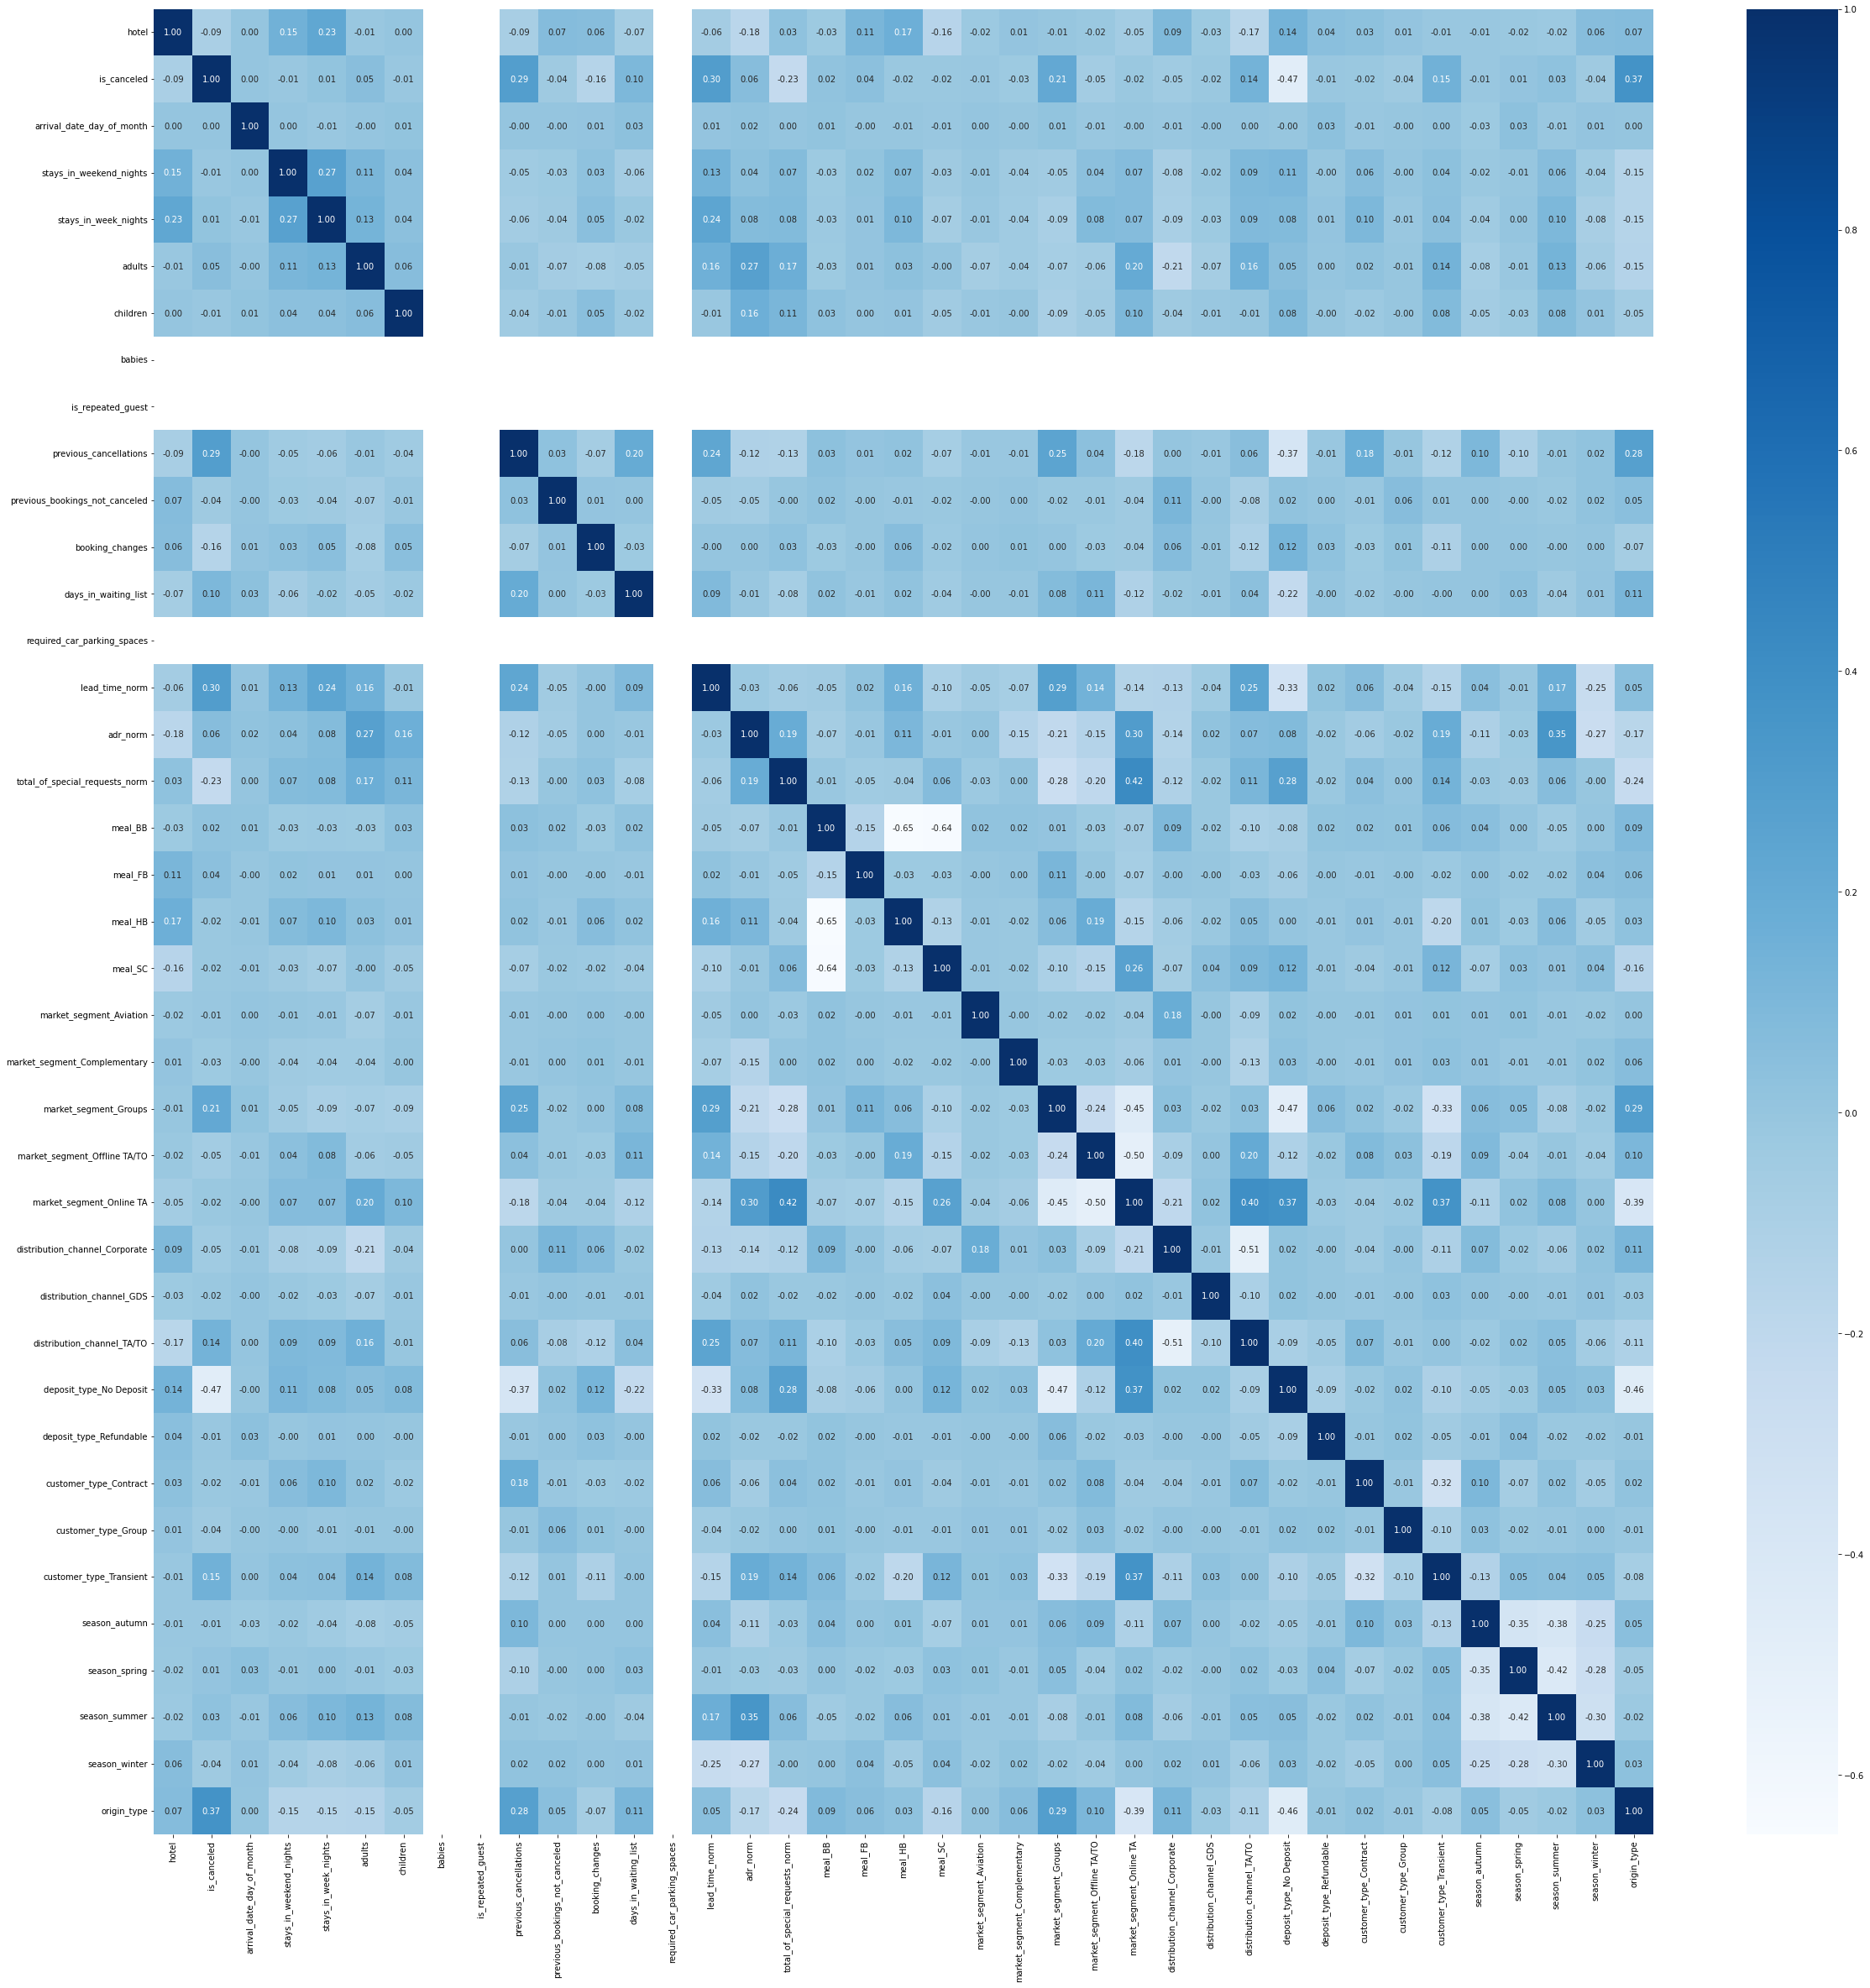

In [ ]:
#cek lagi kolom yang redundan
plt.figure(figsize=(40, 40))
sns.heatmap(df_pre_new.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
df_pre_new.columns

Index(['hotel', 'is_canceled', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces', 'lead_time_norm',
       'adr_norm', 'total_of_special_requests_norm', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Corporate', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'deposit_type_No Deposit',
       'deposit_type_Refundable', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'reserved_vs_assigned', 'season_autumn', 'season_spring',
       'season_summer', 'season_winter', 'origin_type'],
      dtype='object')

In [ ]:
df_pre_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97372 entries, 2 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           97372 non-null  int64  
 1   is_canceled                     97372 non-null  int64  
 2   arrival_date_day_of_month       97372 non-null  int64  
 3   stays_in_weekend_nights         97372 non-null  int64  
 4   stays_in_week_nights            97372 non-null  int64  
 5   adults                          97372 non-null  int64  
 6   children                        97372 non-null  int64  
 7   babies                          97372 non-null  int64  
 8   is_repeated_guest               97372 non-null  int64  
 9   previous_cancellations          97372 non-null  int64  
 10  previous_bookings_not_canceled  97372 non-null  int64  
 11  booking_changes                 97372 non-null  int64  
 12  days_in_waiting_list           

### Convert dataframe 
yang telah di preprocessing ke dalam sebuah file csv baru

In [ ]:
df_pre_new.to_csv('hotel_booking_after_preprocessing5.csv', index=False)